In [1]:
import numpy as np
import pandas as pd
import statistics
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import seaborn as sns
from munch import Munch
from scipy.optimize import brentq

In [2]:
from IPython.core.debugger import set_trace

In [4]:
from io import BytesIO
from IPython.display import SVG
def display_svg(filename=None):
    plt.rcParams['svg.fonttype'] = 'none'
    svg = BytesIO()
#     plt.tight_layout()
    plt.savefig(svg, format="svg",bbox_inches = 'tight')
    if filename:
        plt.savefig(filename, format="svg",bbox_inches = 'tight')
    plt.close()
    svg.seek(0)
    display(SVG(svg.read()))

## Figure 6a

In [5]:
fig6a_data = pd.read_csv("../data/fig6a.tsv", sep="\t")

In [6]:
fig6a_data.head()

,Individual ID,Original Coverage,100x Coverage,80x Coverage,60x Coverage,30x-40x Coverage
0,IID_H133673,98,NaN,81.0,60,32
1,IID_H134753,105,NaN,80.0,60,33
2,IID_H134754,67,NaN,NaN,60,32
3,IID_H134755,81,NaN,NaN,60,32
4,IID_H134756,91,NaN,80.0,60,32


In [7]:
all_coverages = pd.DataFrame({"Coverage":
    list(fig6a_data["100x Coverage"].dropna()) +
    list(fig6a_data["80x Coverage"].dropna()) +
    list(fig6a_data["60x Coverage"].dropna()) +
    list(fig6a_data["30x-40x Coverage"].dropna())
})
for idx, row in all_coverages.iterrows():
    if row.Coverage > 90:
        all_coverages.loc[idx, 'Level'] = '100X'
    elif row.Coverage > 70:
        all_coverages.loc[idx, 'Level'] = '80X'
    elif row.Coverage > 50:
        all_coverages.loc[idx, 'Level'] = '60X'
    else:
        all_coverages.loc[idx, 'Level'] = '30X'

/juno/work/isabl/opt/python/.virtualenvs/users/domenicd/default_python3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/juno/work/isabl/opt/python/.virtualenvs/users/domenicd/default_python3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/juno/work/isabl/opt/python/.virtualenvs/users/domenicd/default_python3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


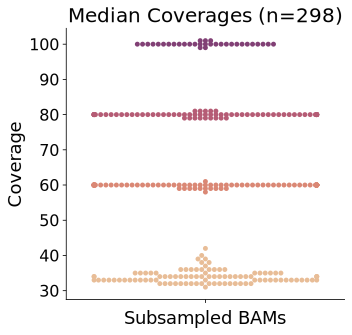

In [8]:
ss_levels = {'100X':'#814075','80X':'#B55C75','60X':'#DA8875','30X':'#E8BD97'}

fig, ax = plt.subplots(figsize=(5,5))

g = sns.swarmplot(y=all_coverages[all_coverages.Level=='100X']['Coverage'], color=ss_levels['100X'], ax=ax)
g = sns.swarmplot(y=all_coverages[all_coverages.Level=='80X']['Coverage'], color=ss_levels['80X'], ax=ax)
g = sns.swarmplot(y=all_coverages[all_coverages.Level=='60X']['Coverage'], color=ss_levels['60X'], ax=ax)
g = sns.swarmplot(y=all_coverages[all_coverages.Level=='30X']['Coverage'], color=ss_levels['30X'], ax=ax)

g.set_xlabel('Subsampled BAMs', fontsize=18)
g.set_ylabel('Coverage', fontsize=18)

for tick in g.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

g.set_title(f'Median Coverages (n={len(all_coverages)})',fontsize=20)

sns.despine()
display_svg()

## Figure 6b

In [9]:
fig6b_data = pd.read_csv("../data/fig6b.tsv", sep="\t")

In [10]:
fig6b_data.head()

,Individual ID,Mutation Type,Purity,Original Coverage,Effective Coverage,Original Mutation Ct,Ratio,Loss/Gain
0,IID_H108333,INDELs,0.89534,114,102.06876,646.0,637/593,-6.811146
1,IID_H108333,Rearrangements,0.89534,114,102.06876,40.0,40/36,-10.000000
2,IID_H108333,SNVs,0.89534,114,102.06876,4275.0,4114.0/3317.0,-18.643275
3,IID_H133672,INDELs,0.85595,101,86.45095,1393.0,1393/1287,-7.609476
4,IID_H133672,Rearrangements,0.85595,101,86.45095,14.0,14/8,-42.857143


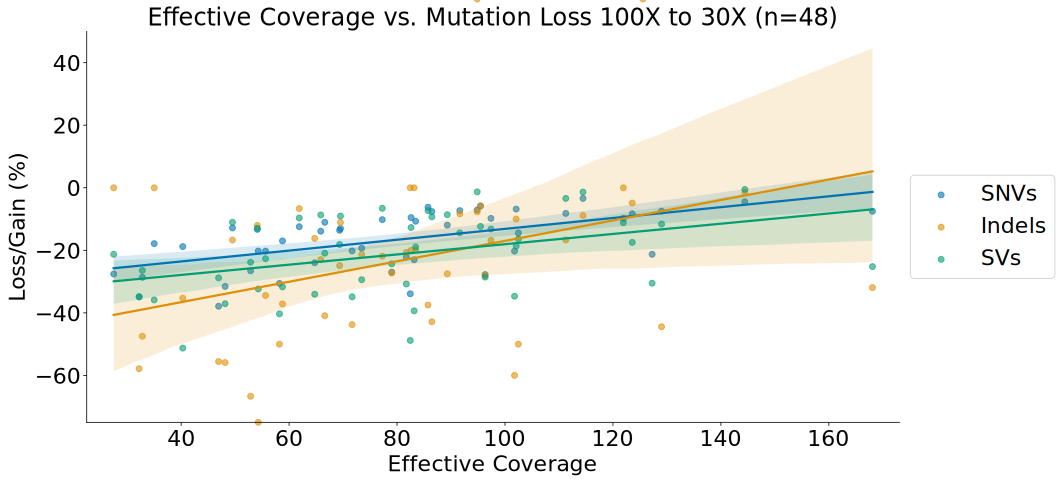

In [11]:
g_both = sns.lmplot(
    data=fig6b_data,
    x="Effective Coverage",
    y="Loss/Gain",
    hue="Mutation Type",
    height=6,
    aspect=2,
    scatter_kws={'alpha':0.6, 'clip_on':False},
    legend=False,
    palette='colorblind'
)
leg = g_both.ax.legend(fontsize=22, loc='center left', bbox_to_anchor=(1,0.5))
leg.get_texts()[0].set_text('SNVs')
leg.get_texts()[1].set_text('Indels')
leg.get_texts()[2].set_text('SVs')

g_both.ax.set_ylim(min(fig6b_data['Loss/Gain'])-5,max(fig6b_data['Loss/Gain'])+5)

for tick in g_both.ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(22) 
for tick in g_both.ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)

g_both.ax.set_title(f"Effective Coverage vs. Mutation Loss 100X to 30X (n={len(fig6b_data)/3:.0f})", fontsize=24)
g_both.ax.set_ylabel('Loss/Gain (%)', fontsize=22)
g_both.ax.set_xlabel('Effective Coverage', fontsize=22)
plt.ylim(-75,50)
plt.xlim(min(fig6b_data['Effective Coverage'])-5,max(fig6b_data['Effective Coverage']+5))
display_svg()

## Figure 6c

In [12]:
fig6c_data = pd.read_csv("../data/fig6c.tsv", sep="\t")

In [13]:
fig6c_data.head()

,Individual ID,Coverage,Purity,Mutation Type,Original Events,Events 100X,Sensitivity 100X,Events 80X,Sensitivity 80X,Events 60X,Sensitivity 60X,Events 30X,Sensitivity 30X
0,IID_H133673,98,0.78842,SNVs,8030,NaN,NaN,7715.0,0.960772,7601,0.946575,7286,0.907347
1,IID_H133673,98,0.78842,Indels,1148,NaN,NaN,1106.0,0.963415,1068,0.930314,980,0.853659
2,IID_H133673,98,0.78842,SVs,32,NaN,NaN,29.0,0.906250,29,0.906250,24,0.750000
3,IID_H134753,105,0.52988,SNVs,5377,NaN,NaN,5084.0,0.945509,4779,0.888786,4080,0.758787
4,IID_H134753,105,0.52988,Indels,701,NaN,NaN,649.0,0.925820,606,0.864479,509,0.726106


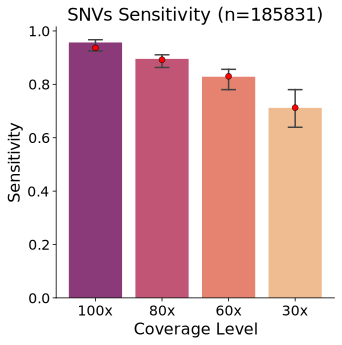

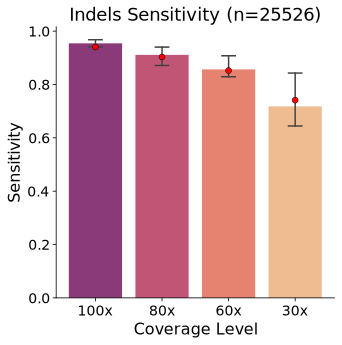

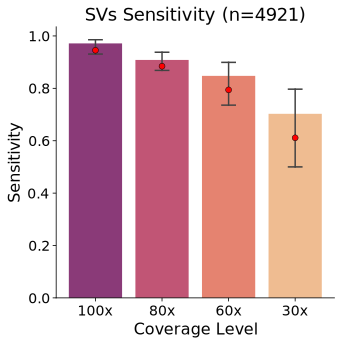

In [14]:
magma = sns.color_palette('magma')[2:]
ss_levels = ['100x','80x','60x','30x']

pal = dict(zip(ss_levels,magma))

for mut_type in fig6c_data['Mutation Type'].unique():
    fig, ax = plt.subplots(figsize=(5,5))
    df = pd.melt(fig6c_data[fig6c_data['Mutation Type'] == mut_type].rename(
        columns={'Sensitivity 100X':'100x',
                 'Sensitivity 80X':'80x',
                 'Sensitivity 60X':'60x',
                 'Sensitivity 30X':'30x'}
    ), id_vars =['Individual ID'], value_vars =['100x', '80x', '60x', '30x'], var_name='Level', value_name='Sensitivity')
    
    samples = df[(df.Level=='100x')&(df.Sensitivity.notna())]["Individual ID"].unique()
    df = df[(df["Individual ID"].isin(samples))]
    g = sns.barplot(x="Level", y="Sensitivity", data=df, palette=pal, capsize=.2, ci=95, estimator=statistics.median, errwidth=1.5)
    
    total_events = fig6c_data[(fig6c_data['Mutation Type'] == mut_type)&(fig6c_data['Sensitivity 100X'].notna())]['Original Events'].sum()
    overall_sens_df = pd.DataFrame()
    for level in ['100X','80X','60X','30X']:
        sens = fig6c_data[(fig6c_data['Mutation Type']==mut_type)&(fig6c_data['Sensitivity 100X'].notna())][f"Events {level}"].sum() / total_events
        overall_sens_df = overall_sens_df.append({'Sensitivity':sens, 'Level':level.lower()}, ignore_index=True)
    sns.scatterplot(data=overall_sens_df, y='Sensitivity', x='Level', legend=False, color='r',edgecolor='black', zorder=10, ax=ax)

    for tick in g.get_xticklabels():
        tick.set_fontsize(14) 

    for tick in g.get_yticklabels():
        tick.set_fontsize(14)

    ax.set_xlabel('Coverage Level', fontsize=16)
    ax.set_ylabel('Sensitivity', fontsize=16)
    ax.set_title(f'{mut_type} Sensitivity (n={total_events})', fontsize=18)

    sns.despine()
    display_svg()

## Figure 6d

In [15]:
fig6de_data = pd.read_csv("../data/fig6de.tsv", sep="\t")

In [16]:
fig6de_data.head()

,Individual ID,Locus,Variant Type,Level,Called Denovo,Effective Local Coverage,Effective Global Coverage,WGS VAF,MSK-IMPACT Depth,MSK-IMPACT VAF,Read Support
0,IID_H108333,3:178917478,SNP,100x,True,94.90604,90.42934,0.339623,355.0,0.270423,36.0
1,IID_H108333,3:178917478,SNP,30x,True,30.44156,29.54622,0.205882,355.0,0.270423,7.0
2,IID_H108333,3:178917478,SNP,60x,True,56.40642,53.72040,0.253968,355.0,0.270423,16.0
3,IID_H108333,3:178917478,SNP,80x,True,70.73186,71.62720,0.278481,355.0,0.270423,22.0
4,IID_H133671,X:123164962,SNP,30x,True,8.38953,29.82944,1.000000,207.0,0.971014,9.0


In [17]:
def cumulative_prob(s, p, n):
    # Cumulative Binomial Probability
    x = 1.0 - p
    a = n - s
    b = s + 1
    c = a + b - 1
    prob = 0.0
    for j in range(a, c + 1):
        prob += math.factorial(c) / (math.factorial(j)*math.factorial(c-j)) \
                * x**j * (1 - x)**(c-j)
    return prob

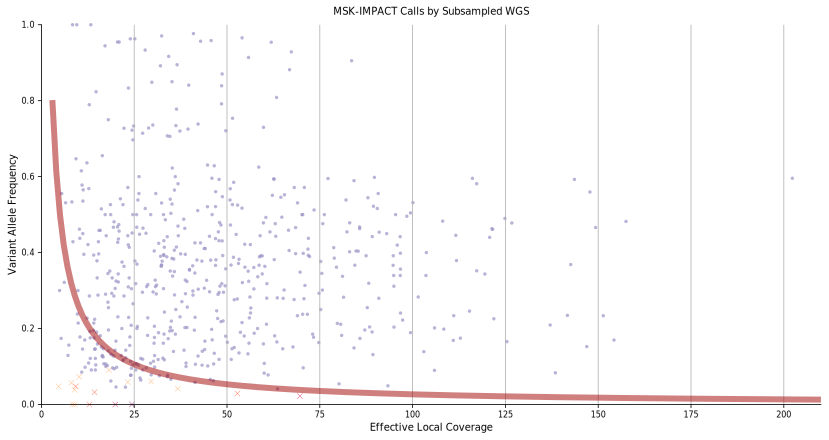

In [18]:
magma = sns.color_palette('magma')[2:]
ss_levels = ['100x','80x','60x','30x']
pal = dict(zip(ss_levels,magma))

fig, ax = plt.subplots(figsize=[14, 7])
g = sns.scatterplot(
    data=fig6de_data[fig6de_data["Called Denovo"]==True],
    x='Effective Local Coverage',
    y='WGS VAF',
    hue='Called Denovo',
    hue_order=[True,False],
    ax=ax,
    edgecolor=None,
    style='Called Denovo',
    style_order=[False,True],
    palette=['#9B94C7','#EB4511'],
    legend=False,
    alpha=0.7,
    clip_on=False,
    s=10,
    markers={True: "o", False: "X"}
)

g = sns.scatterplot(
    data=fig6de_data[fig6de_data["Called Denovo"]==False],
    x='Effective Local Coverage',
    y='WGS VAF',
    hue='Level',
    hue_order=['30x','60x','80x','100x'],
    palette=pal,
    ax=ax,
    style='Called Denovo',
    style_order=[False,True],
    legend=False,
    s=30,
    clip_on=False,
    markers={True: "+", False:"x"}
)

# plot likelihood of 2 reads curve
maxn = 250
likely = .5
reads = 2
ax.plot(
    list(range(reads+1,maxn)),
    [brentq(lambda p: 1 - likely - cumulative_prob(reads,p,n), 0, 1) for n in range(reads+1,maxn)],
    color='#A30000',
    linestyle='-',
    linewidth=6.0,
    alpha=0.5
)

g.set_ylabel('Variant Allele Frequency', fontsize=10)
g.set_xlabel('Effective Local Coverage', fontsize=10)
g.set_title('MSK-IMPACT Calls by Subsampled WGS', fontsize=10, pad=10)

plt.ylim(0,1)
plt.xlim(0,210)
for tick in g.xaxis.get_major_ticks():
    tick.label.set_fontsize(8) 
for tick in g.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    
plt.grid(True, axis='x')
sns.despine()
display_svg()

## Figure 6e

/juno/work/isabl/opt/python/.virtualenvs/users/domenicd/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/juno/work/isabl/opt/python/.virtualenvs/users/domenicd/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator


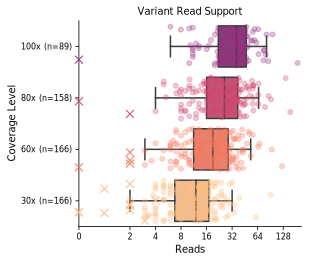

In [19]:
magma = sns.color_palette('magma')[2:]
ss_levels = ['100x','80x','60x','30x']
pal = dict(zip(ss_levels,magma))

fig, ax = plt.subplots(figsize=(4,3.8))

df = fig6de_data.copy()

sns.boxplot(
    data=df[df["Called Denovo"].astype(bool)],
    y='Level',
    x='Read Support',
    palette=pal,
    order=['100x','80x','60x','30x'],
    showfliers=False,
    ax=ax
)
sns.stripplot(
    data=df[df["Called Denovo"].astype(bool)],
    y='Level',
    x='Read Support',
    palette=pal,
    alpha=0.3,
    jitter=.4,
    edgecolor=None,
    linewidth=1,
    order=['100x','80x','60x','30x'],
    ax=ax,
    clip_on=True
)
sns.stripplot(
    data=df[~df["Called Denovo"].astype(bool)],
    y='Level',
    x='Read Support',
    palette=pal,
    marker='x',
    jitter=.4,
    size=8,
    edgecolor='black',
    linewidth=1,
    order=['100x','80x','60x','30x'],
    ax=ax,
    clip_on=False
)
    
elements = [
    Line2D([0], [0], marker='o', color='w', label='Called', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='x', color='w', label='Missed', markerfacecolor='black', markeredgecolor='black', markersize=10)
]

ax.set_ylabel('Coverage Level', fontsize=10)
ax.set_xlabel('Reads', fontsize=10)

n=len(df.drop_duplicates(['Individual ID','Locus']))
ax.set_title(f'Variant Read Support', fontsize=10)


ax.set_xscale('symlog', basex=2)
plt.xlim(0,max(df['Read Support'])+20)

new_names = []
for i, tick in enumerate(ax.get_xticklabels()):
    if i == 0:
        new_names.append(f"{i}")
    else:
        new_names.append(f"{int(2**i)}")
    tick.set_fontsize(8)
ax.set_xticklabels(new_names)
ax.xaxis.set_tick_params(which='major', bottom=True)

new_names = []
for tick in ax.get_yticklabels():
    new_names.append(f"{tick.get_text()} (n={len(fig6de_data[fig6de_data.Level==tick.get_text()])})")
    tick.set_fontsize(8) 
ax.set_yticklabels(new_names)

sns.despine()
display_svg()

## S. Figure 6a

In [20]:
sfig6ac_data = pd.read_csv("../data/sfig6ac.tsv", sep="\t")

In [21]:
sfig6ac_data.head()

,IID,Finding Type,Notes,Called in 100X,Called in 80X,Called in 60X,Called in 30X
0,IID_H156409_T01_01_WG01,Rearrangement,TP53,NaN,True,True,True
1,IID_H136641_T01_01_WG01,Rearrangement,TP53,NaN,True,True,True
2,IID_H158273_T01_01_WG01,Rearrangement,TP53,True,True,True,True
3,IID_H159369_T01_01_WG01,Rearrangement,DLG2,True,True,True,True
4,IID_H158919_T01_01_WG01,Rearrangement,RB1,True,True,True,True


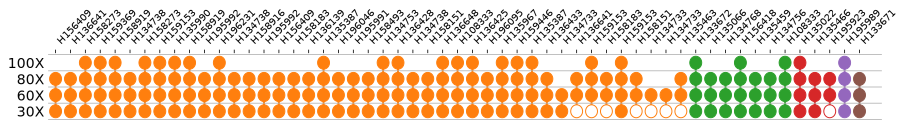

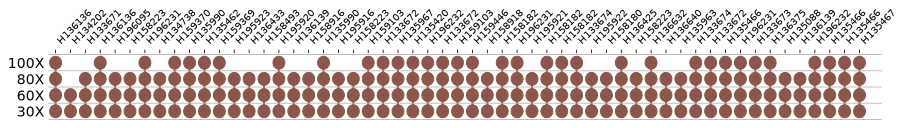

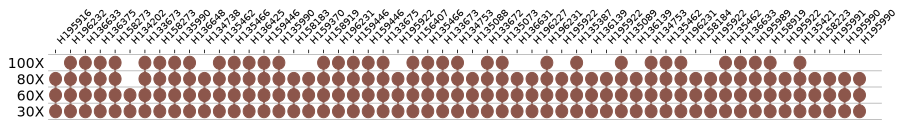

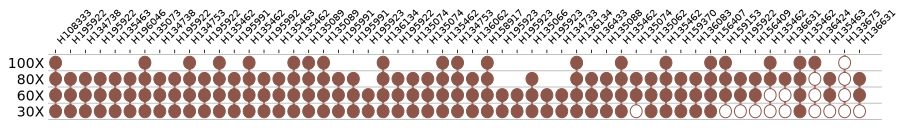

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

ylabels = ["30X","60X","80X","100X"]

colors = sns.color_palette("tab10")[1:]
find_type = ["Rearrangement","Fusion","TMB","SNV","IMPACT Small Mutation"]
pal = dict(zip(find_type,colors))

all_onco_find = np.array_split(sfig6ac_data, 4)

last = len(all_onco_find)-1
for data in all_onco_find:
    fig, ax = plt.subplots(figsize=(15,1.25))
    xlabels = []
    N = len(ylabels)
    M = len(data)
    R = .4
    x, y = np.meshgrid(np.arange(M), np.arange(N))

    row=0
    col=0
    for _, find in data.iterrows():
        xlabels.append(find.IID.split("_")[1] if "_" in find.IID else "".join(find.IID.split("-")[1:3]))
        liney = []
        false_marked = False
        for level in ylabels:
            if find[f"Called in {level}"] == True:
                circle = plt.Circle((col,row), R, color=pal[find['Finding Type']], zorder=2)
                ax.add_patch(circle)
                liney.append(row)
            elif find[f"Called in {level}"] == False:
                circle = plt.Circle((col,row), R, facecolor='w', edgecolor=pal[find['Finding Type']], zorder=2)
                ax.add_patch(circle)
                liney.append(row+R)
            else:
                pass
            row+=1
        linex = [col]*len(liney)
        ax.plot(linex, liney,color=pal[find['Finding Type']], lw=2, zorder=1)
        
        col+=1
        row=0
    
    ax.set(xticks=np.arange(M), xticklabels=xlabels, yticks=np.arange(N), yticklabels=ylabels)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    ax.tick_params(axis=u'y', which=u'both',length=0)
    ax.set_xticklabels(xlabels, rotation=45, ha='left')
    ax.xaxis.tick_top()
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax.grid(which='minor')
    
    elements = [
        Line2D([0], [0], marker='o', color='w', label='Rearrangement', markerfacecolor=pal['Rearrangement'], markersize=10),
                Line2D([0], [0], marker='o', color='w', label='Fusion', markerfacecolor=pal['Fusion'], markersize=10),
                Line2D([0], [0], marker='o', color='w', label='TMB', markerfacecolor=pal['TMB'], markersize=10),
                Line2D([0], [0], marker='o', color='w', label='SNV', markerfacecolor=pal['SNV'], markersize=10),
                Line2D([0], [0], marker='o', color='w', label='IMPACT Small Mutation', markerfacecolor=pal['IMPACT Small Mutation'], markersize=10)
    ]
    
    plt.xlim(-.5, M+.5)
    sns.despine(left=True,bottom=True)
    display_svg()

## S. Figure 6b

In [23]:
sfig6b_data = pd.read_csv("../data/sfig6b.tsv", sep="\t")

In [24]:
sfig6b_data.head()

,Individual ID,Level,Coverage,TMB Genomewide,TMB Coding
0,IID_H108333,100X,100,1.638276,1.800000
1,IID_H108333,30X,30,1.348276,1.566667
2,IID_H108333,60X,60,1.480345,1.666667
3,IID_H108333,80X,80,1.572069,1.833333
4,IID_H108333,original,114,1.696897,1.933333


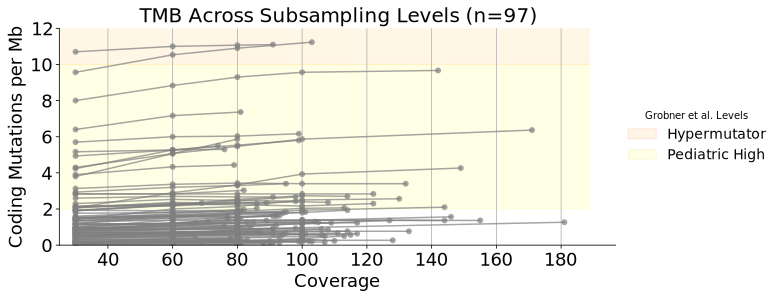

In [25]:
plt.figure(figsize=[10,4])
g = sns.lineplot(
    data=sfig6b_data,
    x='Coverage',
    y='TMB Coding',
    units='Individual ID',
    estimator=None,
    color="grey",
    marker="o",
    **{"markeredgecolor":"none"},
    alpha=0.7
)
g.set_title('TMB Across Subsampling Levels')
g.set_ylabel('Coding Mutations per Mb', fontsize=18)
g.set_xlabel('Coverage', fontsize=18)
g.set_title(f'TMB Across Subsampling Levels (n={len(sfig6b_data["Individual ID"].unique())})', fontsize=20)
sns.despine()

for tick in g.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in g.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

x = g.get_xlim()
g.fill_between(x, 2, 10, color='yellow', alpha=0.1)
g.fill_between(x, 10, 100, color='orange', alpha=0.1)

elements = [Patch(facecolor='orange', edgecolor='r', alpha=0.1, label='Hypermutator'),
            Patch(facecolor='yellow', edgecolor='y', alpha=0.1, label='Pediatric High')]
g.legend(title='Grobner et al. Levels', fontsize=14, handles=elements, loc='center left', bbox_to_anchor=(1,0.5), frameon=False)

plt.grid(True, axis='x')
plt.ylim(0,12)
plt.xlim(25,)
display_svg()

## S. Figure 6c

In [26]:
sfig6ac_data.head()

,IID,Finding Type,Notes,Called in 100X,Called in 80X,Called in 60X,Called in 30X
0,IID_H156409_T01_01_WG01,Rearrangement,TP53,NaN,True,True,True
1,IID_H136641_T01_01_WG01,Rearrangement,TP53,NaN,True,True,True
2,IID_H158273_T01_01_WG01,Rearrangement,TP53,True,True,True,True
3,IID_H159369_T01_01_WG01,Rearrangement,DLG2,True,True,True,True
4,IID_H158919_T01_01_WG01,Rearrangement,RB1,True,True,True,True


In [27]:
level_sensitivities = pd.DataFrame()
for level in ["100X", "80X", "60X", "30X"]:
    calls = list(sfig6ac_data[f"Called in {level}"].dropna())
    level_sensitivities = level_sensitivities.append(
        {"Level":level,
        "Sensitivity":calls.count(True)/len(calls)},
        ignore_index=True
    )

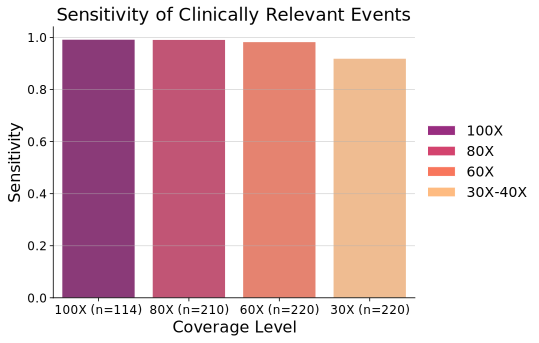

In [28]:
magma = sns.color_palette('magma')[2:]
ss_levels = ['100X','80X','60X','30X']
pal = dict(zip(ss_levels, magma))

fig, ax = plt.subplots(figsize=(6.5,5))
g = sns.barplot(x="Level", y="Sensitivity", data=level_sensitivities, palette=pal)
new_names = []
for tick in g.get_xticklabels():
    level_list = list(sfig6ac_data[f"Called in {tick.get_text()}"].dropna())
    new_names.append(f"{tick.get_text()} (n={len(level_list)})")
    tick.set_fontsize(12)
g.set_xticklabels(new_names)
for tick in g.get_yticklabels():
    tick.set_fontsize(12)
    
elements = [
            Patch(facecolor=pal['100X'], edgecolor='w', label='100X'),
            Patch(facecolor=pal['80X'], edgecolor='w', label='80X'),
            Patch(facecolor=pal['60X'], edgecolor='w', label='60X'),
            Patch(facecolor=pal['30X'], edgecolor='w', label='30X-40X')
           ]
ax.legend(fontsize=14, handles=elements, loc='center left', bbox_to_anchor=(1,0.5), frameon=False)
g.set_xlabel('Coverage Level', fontsize=16)
g.set_ylabel('Sensitivity', fontsize=16)
g.set_title(f'Sensitivity of Clinically Relevant Events', fontsize=18)
plt.grid(axis='y',alpha=0.5)
sns.despine()
display_svg()

## Figure 7a & Figure 7b

In [29]:
fig7ab_data = pd.read_csv("../data/fig7ab.tsv", sep="\t")

In [30]:
fig7ab_data.head()

,Individual ID,DNA IID,DNA Coverage,DNA Purity,cfDNA IID,cfDNA Coverage,cfDNA Purity
0,IID_H135420,I-H-135420-T1-2-D1-1,127.0,0.973072,IID_H135420_T02_01_WG01,95.0,0.1400
1,IID_H156407,IID_H156407_T01_01_WG01,95.0,0.618687,IID_H156407_T04_01_WG01,99.0,0.1800
2,IID_H135967,I-H-135967-T1-2-D1-1,99.0,0.665310,IID_H135967_T03_01_WG01,102.0,0.1995
3,IID_H136631,IID_H136631_T01_01_WG01,82.0,0.220340,IID_H136631_T02_01_WG01,96.0,0.2000
4,IID_H136136,I-H-136136-T1-1-D1-1,128.0,0.952560,IID_H136136_T02_01_WG01,100.0,0.2700


In [31]:
id_order = [x["Individual ID"] for _,x in fig7ab_data.sort_values(by='cfDNA Purity').iterrows()]

In [32]:
df = pd.DataFrame()
for _, indiv in fig7ab_data.iterrows():
    df = df.append(
        {"IID":indiv["Individual ID"],
         "Coverage":indiv["DNA Coverage"],
         "Purity":indiv["DNA Purity"],
         "Source":"Tumor"},
        ignore_index=True
    )
    df = df.append(
        {"IID":indiv["Individual ID"],
         "Coverage":indiv["cfDNA Coverage"],
         "Purity":indiv["cfDNA Purity"],
         "Source":"cfDNA"},
        ignore_index=True
    )

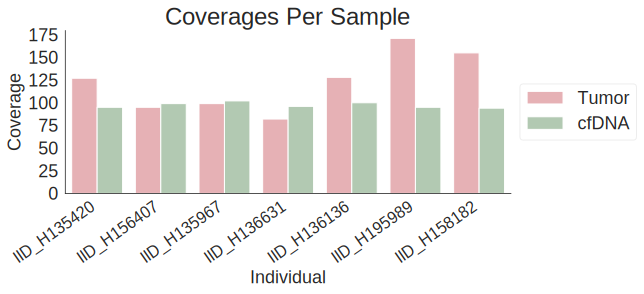

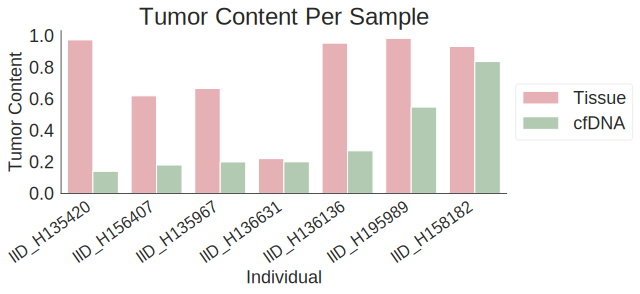

In [33]:
sns.set_style('white')
cmap = ['#EFA8AE', '#AECDAE', '#DCC1AE']

fig, ax = plt.subplots(figsize=[8,3])
sns.set_color_codes("muted")
g = sns.barplot(x="IID", y="Coverage", hue="Source", hue_order=['Tumor','cfDNA'], order=id_order, data=df, ax=ax, palette=cmap)
g.set_xticklabels(g.get_xticklabels(), rotation=35, ha="right")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, framealpha=0.35, fontsize=18)

for tick in g.xaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
for tick in g.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

g.set_xlabel('Individual',fontsize=18)
g.set_ylabel('Coverage',fontsize=18)
g.set_title('Coverages Per Sample', fontsize=24)
sns.despine()

display_svg()

fig, ax = plt.subplots(figsize=[8,3])
sns.set_color_codes("muted")
g = sns.barplot(x="IID", y="Purity", hue="Source", hue_order=['Tumor','cfDNA'], data=df, order=id_order, ax=ax, palette=cmap)
g.set_xticklabels(g.get_xticklabels(), rotation=35, ha="right")

handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Tissue'
ax.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, framealpha=0.35, fontsize=18)

for tick in g.xaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
for tick in g.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

g.set_xlabel('Individual',fontsize=18)
g.set_ylabel('Tumor Content',fontsize=18)
g.set_title('Tumor Content Per Sample', fontsize=24)
sns.despine()

display_svg()

## Figure 7c

In [34]:
fig7c_data = pd.read_csv("../data/fig7c.tsv", sep="\t")

In [35]:
fig7c_data.head()

,Individual ID,Tumor SNVs,Tumor Indels,Tumor SVs,cfDNA SNVs,cfDNA Indels,cfDNA SVs,Shared SNVs,Shared Indels,Shared SVs
0,IID_H136631,5188.0,333.0,5.0,565.0,234.0,0.0,3.0,1.0,0.0
1,IID_H135420,4670.0,600.0,41.0,359.0,394.0,0.0,63.0,1.0,0.0
2,IID_H156407,5431.0,571.0,35.0,282.0,218.0,1.0,2.0,0.0,0.0
3,IID_H135967,7157.0,1871.0,401.0,3998.0,381.0,12.0,15788.0,853.0,108.0
4,IID_H136136,1059.0,481.0,4.0,605.0,257.0,0.0,660.0,71.0,0.0


In [36]:
# organize fig7c data by purity
df = (
    fig7c_data.merge(fig7ab_data[["Individual ID", "cfDNA Purity"]], on=["Individual ID"], how="outer")
    .sort_values(by="cfDNA Purity")
    .drop("cfDNA Purity", axis=1)
)

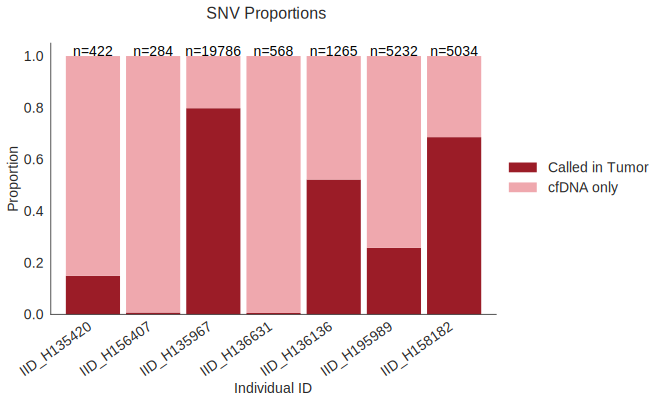

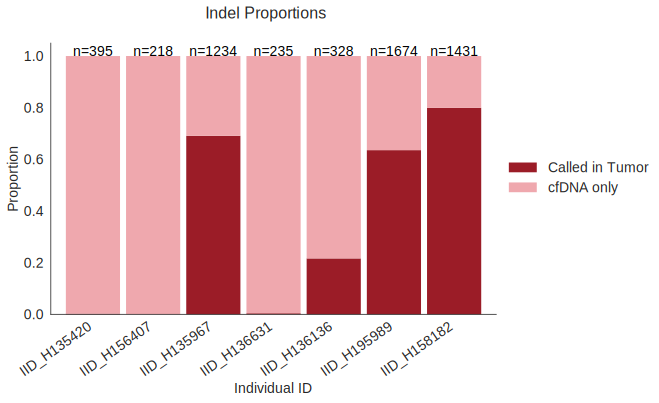

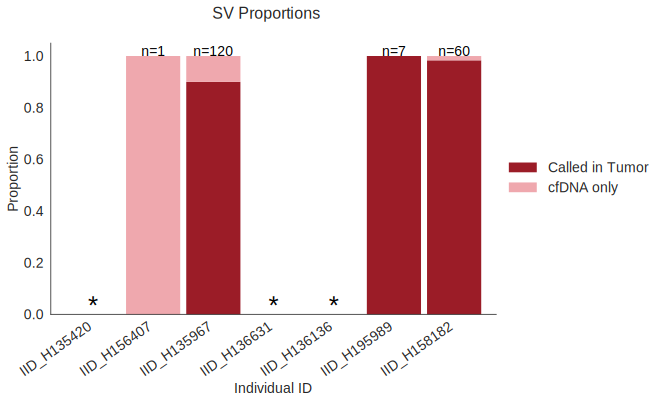

In [37]:
cmap = ListedColormap(['#9B1C27','#EFA8AE'])

snv_df = pd.DataFrame(columns=['cfDNA only','Called in Tumor'])
indel_df = pd.DataFrame(columns=['cfDNA only','Called in Tumor'])
sv_df = pd.DataFrame(columns=['cfDNA only','Called in Tumor'])

snv_totals = []
indel_totals = []
sv_totals = []

for _, indiv in df.iterrows():
    snv_total = indiv["cfDNA SNVs"] + indiv["Shared SNVs"]
    indel_total = indiv["cfDNA Indels"] + indiv["Shared Indels"]
    sv_total = indiv["cfDNA SVs"] + indiv["Shared SVs"]
    snv_totals.append(snv_total)
    indel_totals.append(indel_total)
    sv_totals.append(sv_total)
    
    snv_df.loc[indiv["Individual ID"], "cfDNA only"] = indiv["cfDNA SNVs"]/snv_total
    snv_df.loc[indiv["Individual ID"], "Called in Tumor"] = indiv["Shared SNVs"]/snv_total
    indel_df.loc[indiv["Individual ID"], "cfDNA only"] = indiv["cfDNA Indels"]/indel_total
    indel_df.loc[indiv["Individual ID"], "Called in Tumor"] = indiv["Shared Indels"]/indel_total 
    if sv_total > 0:
        sv_df.loc[indiv["Individual ID"], "cfDNA only"] = indiv["cfDNA SVs"]/sv_total
        sv_df.loc[indiv["Individual ID"], "Called in Tumor"] = indiv["Shared SVs"]/sv_total 
    else:
        sv_df.loc[indiv["Individual ID"], "cfDNA only"] = np.nan
        sv_df.loc[indiv["Individual ID"], "Called in Tumor"] = np.nan
    

fig,ax = plt.subplots(figsize=(8,5))
g = snv_df[['Called in Tumor','cfDNA only']].plot(kind='bar',stacked=True, ax=ax, colormap=cmap, width=.9, lw=0)
for i, total in enumerate(snv_totals):
    g.text(i, 1, f'n={total:.0f}', color='black', ha="center", fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=14, frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment='right', fontsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Individual ID', fontsize=14)
sns.despine()
fig.suptitle(f"SNV Proportions", fontsize=16)
display_svg()

fig,ax = plt.subplots(figsize=(8,5))
g = indel_df[['Called in Tumor','cfDNA only']].plot(kind='bar',stacked=True, ax=ax, colormap=cmap, width=.9, lw=0)
for i, total in enumerate(indel_totals):
    g.text(i, 1, f'n={total:.0f}', color='black', ha="center", fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=14, frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment='right', fontsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Individual ID', fontsize=14)
sns.despine()
fig.suptitle(f"Indel Proportions", fontsize=16)
display_svg()   

fig,ax = plt.subplots(figsize=(8,5))
g = sv_df[['Called in Tumor','cfDNA only']].plot(kind='bar',stacked=True, ax=ax, colormap=cmap,  width=.9, lw=0)
for i, total in enumerate(sv_totals):
    if i in [0,3,4]:
        g.text(i, 0, '*', color='black', ha="center", fontsize=26)
    else:
        g.text(i, 1, f'n={total:.0f}', color='black', ha="center", fontsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
ax.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=14, frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment='right', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Individual ID', fontsize=14)
sns.despine()
fig.suptitle(f"SV Proportions", fontsize=16)
display_svg()   